Random walker Diffusion
        

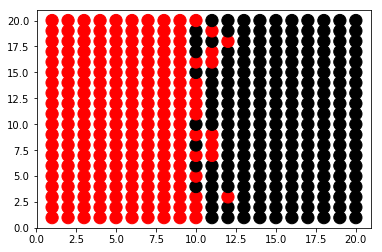

In [1]:

grid = []
size = 20
iterations = 20
color = "r"
for j in range (1,size +1):
    if j > 10:
        color = "k"
    for i in range(1,21):
        grid.append([i,j,color])

import random
pos = [1,-1,+20,-20]
boundary = list(range(20))+list(range(381,401))+list(range(40,400,20))+list(range(21,381,20))

for steps in range(1):
    moved = []
    for i in range(400):
        if i not in boundary:
            if i not in moved:
                direction = random.choice(pos)
                buffer = grid[i][2]
                try:
                    grid[i][2]=grid[i+direction][2]
                    grid[i+direction][2]=buffer
                    moved.append(i+direction)
                except:
                    pass
        
    
import matplotlib.pyplot as plt
plt.scatter([i[1] for i in grid],[i[0] for i in grid],150,[i[2] for i in grid])
plt.show()

Sonderzeichen Schreib trainer

In [2]:
import random
import time
zeichen = ('8', '(', '/', '§', '+', '<', '9', '1', '7', ')', '$', '!', '0', '*', '5', '#', ']', '6', '[', "'", '3', '%', '>', '"', '{', 'ß', '=', '&', '4', '}', '2', '?','\\')
o = ('8', '(', '/', '§', '+', '9', '1', '7', ')', '$', '!', '0', '*', '5', '#', '6',"'", '3', '%','"', 'ß', '=', '&', '4', '2', '?')
def tipp(zeichensatz=zeichen,länge=120):
    aktuel = ""
    nächstes = ""
    punkte = 0
    falsch = 0
    t0 = time.clock()
    while (time.clock()-t0) < länge:
        for i in range(3):
            nächstes += random.choice(zeichensatz)
        if aktuel == "":
            aktuel = nächstes
            nächstes = ""
            continue
        print(aktuel,nächstes)
        eingabe = input()
        if eingabe == "ende":
            break
        if eingabe == aktuel:
            punkte += 1
        else:
            falsch =+1
        aktuel = nächstes
        nächstes = ""
    return round(punkte*3*60/(time.clock()-t0)), falsch
        


In [3]:
tipp()

/{8 #4=
/{8
#4= $9?

$9? %5+
ende


(8, 1)

In [6]:
import time
import random
import matplotlib.pyplot as plt

# Wahrscheinlichkeit pro Jahr und Mensch in der Fruchtbaren Zeit, das ein Kinde geboren wird
fruchtbarkeit = 0.25
# Das alter in dem ein Mensch Fruchtbar ist
fruchtbar = (15,25)
# Das alter in dem ein Mensch stirbt
lebenserwartung = 30
# Verfall gibt Verfall der Werkzeuge an
Verfall = 0.9
# Anzahl der Spielrunden
Runden = 10
# Nahrung, Werkzeuge, Wissen, Verfall, Zuteilung der Leute
Lager = {"Nahrung":2, "Werkzeuge":0, "Wissen":0}
Arbeitsorte = {"Farmer":1, "Handwerker":0, "Wissenschaftler": 0}
Parameter = {"Verfall":Verfall, "Fruchtbarkeit":fruchtbarkeit, "Fruchtbar":fruchtbar, "Lebenserwartung":lebenserwartung,\
            "Runden":Runden, "Faktor_Nahrung":1, "Faktor_Werkzeug":1, "Faktor_Wissen":1}
X = {"Parameter":Parameter, "Arbeitsorte":Arbeitsorte, "Lager":Lager, "Menschen": {}}

#initialisiere die Menscheit mit Adam und Eva am Beginn der Fruchtbaren zeit
def start(X):
    humans = {}
    for age in range(X["Parameter"]["Lebenserwartung"]):
        humans[age] = 0
    humans[fruchtbar[0]] = 2
    X["Menschen"] = humans
    return X

# gibt die totale Bevölkerung wieder
def Bevölkerung(X):
    return sum(X["Menschen"].values())

#lässt Bevölkerung altern und Kinder gebären
def demographie(X):
    for n in range(X["Parameter"]["Lebenserwartung"]):
        X["Menschen"][X["Parameter"]["Lebenserwartung"]-n] = X["Menschen"][X["Parameter"]["Lebenserwartung"]-n-1]
    fruchtbare_population = 0
    for n in range(X["Parameter"]["Fruchtbar"][0],X["Parameter"]["Fruchtbar"][1]):
        fruchtbare_population += X["Menschen"][n]
    Geburten = (fruchtbare_population * X["Parameter"]["Fruchtbarkeit"])
    if fruchtbare_population != 0:
        if Geburten < 1:
            X["Menschen"][0] = 1
        else: 
            X["Menschen"][0] = round(Geburten)
    return X

#Benutzerabfrage wo die Bevölkerung arbeiten soll
def Zuteilung(X):
    while True:
        Aufteilung = input("Verteile die Menschen auf Nahrung, Produktion und Wissenschaft (z.B. 50 25 25)")
        if Aufteilung == "":
            return X
        liste = []
        Zahl = ""
        for char in Aufteilung:
            if char.isnumeric():
                Zahl += char
            elif Zahl != "":
                liste.append(int(Zahl))
                Zahl = ""
        if Zahl != "":
            liste.append(int(Zahl))
        if len(liste) > 2:
            break
    Aufteilung = liste[0:3]
    summe = sum(Aufteilung)
    for n in range(len(Aufteilung)):
        Aufteilung[n] = Aufteilung[n]/summe
    X["Arbeitsorte"]["Farmer"] = Aufteilung[0]
    X["Arbeitsorte"]["Handwerker"] = Aufteilung[1]
    X["Arbeitsorte"]["Wissenschaftler"] = Aufteilung[2]
    return X

#Errechne die Produktion eines Jahres
def Produktion(X):
    Anzahl = Bevölkerung(X)
    Tech = 1 + X["Lager"]["Wissen"]
    Faktor = Anzahl * Tech
    F_N = Faktor * X["Parameter"]["Faktor_Nahrung"]
    F_We= Faktor * X["Parameter"]["Faktor_Werkzeug"]
    F_Wi= Faktor * X["Parameter"]["Faktor_Wissen"]
    X["Lager"]["Nahrung"]  =(F_N * X["Arbeitsorte"]["Farmer"] + X["Lager"]["Werkzeuge"] + X["Lager"]["Nahrung"])
    X["Lager"]["Werkzeuge"]=(F_We * X["Arbeitsorte"]["Handwerker"] + X["Lager"]["Werkzeuge"]*X["Parameter"]["Verfall"])
    X["Lager"]["Wissen"]   =(F_Wi * X["Arbeitsorte"]["Wissenschaftler"] + X["Lager"]["Wissen"])
    return X

#Was wird gegessen wer stirbt
def Konsum(X):
    if X["Lager"]["Nahrung"] >= Bevölkerung(X):
        X["Lager"]["Nahrung"] -= Bevölkerung(X)
    else:
        Lücke = (Bevölkerung(X)-X["Lager"]["Nahrung"])
        alter = 0
        while Lücke > 0:
            if X["Menschen"][alter] > 0:
                X["Menschen"][alter] -= 1
                Lücke -= 1
                continue
            else:
                alter += 1
    return X

#Ein Jahr
def Jahr(X):
    X = Konsum(X)
    X = demographie(X)
    X = Produktion(X)
#    X = Zuteilung(X)
    return X
    
#start the game
def game(F_N,F_We,F_Wi):
    X["Parameter"]["Faktor_Werkzeug"] = F_We
    X["Parameter"]["Faktor_Wissen"] = F_Wi
    X["Parameter"]["Faktor_Nahrung"]= F_N
    start(X)
    Zuteilung(X)
    while X["Parameter"]["Runden"]>0:
        X["Parameter"]["Runden"] -= 1
        Jahr(X)
    return(X["Lager"])

game(1,1,1)




Verteile die Menschen auf Nahrung, Produktion und Wissenschaft (z.B. 50 25 25)1 1 1


{'Nahrung': 34234.61931671329,
 'Werkzeuge': 25571.202677382164,
 'Wissen': 26362.786008230447}

In [6]:
t = {1:"a",2:"b"}
s = ""
for keys > 1 in t:
    s.append(t[keys])
print(s)

SyntaxError: invalid syntax (<ipython-input-6-f1733e976697>, line 3)

In [ ]:
Klassen Upgrades definieren